# Handy small functions related to astronomical research

In [3]:
import math
import numpy as np

## Defining function
### Emission related
#### 1. Dust

In [4]:
def Planckfunc_cgs(freq, temperature):
  """
  Calculate Planck function.
  
  Inputs:
     freq: frequency, in Hz
     temperature: temperature in Kelvin
     
  Return:
     Intensity: in cgs unit ( erg s^-1 sr^-1 cm^-2 Hz-1 )
  """

  # defining physical constants
  c_cgs       = 29979245800.0   # light speed
  h_cgs       = 6.62606885e-27  # planck constant
  kB_cgs      = 1.38064852e-16  # Boltzmann constant

  A = ( 2.0 * h_cgs * (freq**3.0) ) /  ( c_cgs ** 2.0 )
  B = math.exp( (h_cgs * freq) / (kB_cgs * temperature) )
  
  return A * ( 1.0 / (B - 1.0) )




def Planckfunc_mks(freq, temperature):
  """
  Calculate Planck function.
  
  Inputs:
     freq: frequency, in Hz
     temperature: temperature in Kelvin
     
  Return:
     Intensity: in mks unit ( J s^-1 sr^-1 m^-2 Hz-1 )
  """

  # defining physical constants
  c_mks       = 299792458.0   # light speed
  h_mks       = 6.62607004e-34  # planck constant
  kB_mks      = 1.38064852e-23  # Boltzmann constant

  A = ( 2.0 * h_mks * (freq**3.0) ) /  ( c_mks ** 2.0 )
  B = math.exp( (h_mks * freq) / (kB_mks * temperature) )
  
  return A * ( 1.0 / (B - 1.0) )

#### 2. Opacity

In [5]:
# free-free emission


# Simplified dust

### Motions
#### 1. free-fall timescale

In [6]:
def freefall_cgs(density):
  """
  Calculate free-fall timescale.

  Input:
     density: density, in g cm^-3

  Return:
     Free fall time ( seconds )
  """

  # defining physical constants
  G_cgs       = 6.674e-8

  A = 3.0 * math.pi
  B = 32.0 * G_cgs * density

  time = math.sqrt( A / B )
    
  return time

#### 2. Jeans Length and Jeans mass

In [7]:
def Jeanslength_cgs(density, temperature, particlemass):
  """
  Calculate Jeans Length.
  
  Inputs:
     density: density, in  g cm^-3
     temperature: temperature in Kelvin
     particlemass: in g, to be used for calculating sound speed
     
  Return:
     Jeans length in cgs unit ( cm )
  """

  # defining physical constants
  kB_cgs      = 1.38064852e-16  # Boltzmann constant
  G_cgs       = 6.674e-8

  A = 15.0 * kB_cgs * temperature
  B = 4.0 * math.pi * G_cgs * density * particlemass

  length = math.sqrt( A / B )

  return length




def Jeansmass_cgs(density, temperature, particlemass):
  """
  Calculate Jeans mass.
  
  Inputs:
     density: density, in  g cm^-3
     temperature: temperature in Kelvin
     particlemass: in g, to be used for calculating sound speed
     
  Return:
     Jeans mass in cgs unit ( g )
  """
    
  mass = (4.0 / 3.0) * math.pi  \
         * ( Jeanslength_cgs(density, temperature, particlemass) **3 ) \
         * density
        
  return mass



#### 3. Toomore Q parameter

### Observatory related
#### Target source availability

### Frequently used unit/coordinate transformation
#### Brightness tempreature

## Plotting

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Plot Planck function in cgs and mks unit

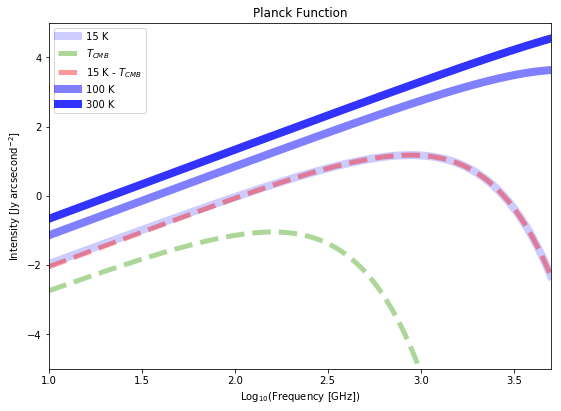

In [24]:
output_array_cgs = np.arange(1, 501) * 0.0   # output of planck function
output_array_mks = np.arange(1, 501) * 0.0

cgsflux_to_Jy = 10e23
mksflux_to_Jy = 10e26

str_to_sqdegree    = 3282.80635
str_to_sqarcsecond = 3282.80635 * (3600.0 ** 2.0)

# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([1.0, 3.7, -5, 5])


# evaluate Planck function in CGS unit
temperature  = 15.0                  # Kelvin
freq_array   = np.arange(1, 501) * 10e9  # frequency in Hz

for id in list(range(0, 500)):
   
   output_array_cgs[id] = Planckfunc_cgs(freq_array[id], temperature) * \
                                  cgsflux_to_Jy / str_to_sqarcsecond
   freq_array[id]   = math.log10( freq_array[id]  / 1e9 )
    
plt.plot(freq_array, np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.2),
         linewidth=8, label = '15 K')
    
# evaluate Planck function in MKS unit
TCMB  = 2.72548                  # Kelvin
freq_array   = np.arange(1, 501) * 10e9  # frequency in Hz

for id in list(range(0, 500)):
  
  output_array_mks[id] = Planckfunc_mks(freq_array[id], TCMB) * \
                                  mksflux_to_Jy / str_to_sqarcsecond
  freq_array[id]   = math.log10( freq_array[id]  / 1e9 )

plt.plot(freq_array, np.log10(output_array_mks), \
          linestyle = 'dashed',
          color = (0.2, 0.6, 0, 0.4),
          linewidth =5, label = '$T_{CMB}$')
plt.plot(freq_array, np.log10(output_array_cgs - output_array_mks), \
          linestyle = 'dashed',
          color = (1.0, 0, 0, 0.4),
          linewidth =5, label = '15 K - $T_{CMB}$')    
    
    
    
# evaluate Planck function in CGS unit
temperature  = 100.0                  # Kelvin
freq_array   = np.arange(1, 501) * 10e9  # frequency in Hz

for id in list(range(0, 500)):
   
   output_array_cgs[id] = Planckfunc_cgs(freq_array[id], temperature) * \
                                  cgsflux_to_Jy / str_to_sqarcsecond
   freq_array[id]   = math.log10( freq_array[id]  / 1e9 )
    
plt.plot(freq_array, np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.5),
         linewidth=8, label = '100 K')


# evaluate Planck function in CGS unit
temperature  = 300.0                  # Kelvin
freq_array   = np.arange(1, 501) * 10e9  # frequency in Hz

for id in list(range(0, 500)):
   
   output_array_cgs[id] = Planckfunc_cgs(freq_array[id], temperature) * \
                                  cgsflux_to_Jy / str_to_sqarcsecond
   freq_array[id]   = math.log10( freq_array[id]  / 1e9 )
    
plt.plot(freq_array, np.log10(output_array_cgs), \
         color = (0, 0, 1.0, 0.8),
         linewidth=8, label = '300 K')



plt.title('Planck Function')
plt.xlabel('Log$_{10}$(Frequency [GHz])')
plt.ylabel('Intensity [Jy arcsecond$^{-2}$]')
plt.legend(loc=2)

### Plot free-fall time as a function of cloud particle number density

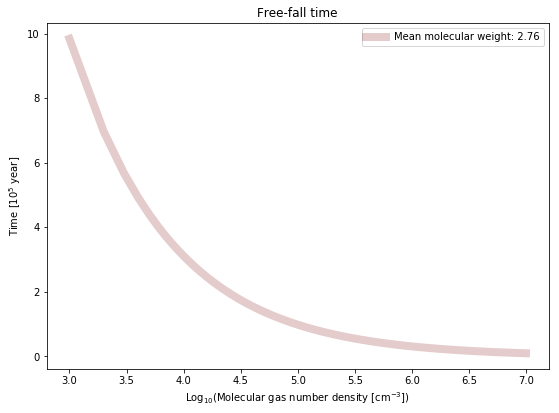

In [16]:
# physical constants
mean_mol_weight = 2.76  # mean molecular weight
mole            = 6.02214129e23
year_to_s       = 365.0 * 24.0 * 60.0 * 60.0

# initializing arrays
number_density = np.arange(1, 10001, 1) * 1e3
output_array_cgs = np.arange(1, 10001, 1) * 0.0


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
# plt.axis([4.0, 6.5, 0.01, 0.2])

# evaluate free-fall time
for id in list( range(0,10000) ):
  
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = freefall_cgs(density) / ( year_to_s * 1e5)


plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0.5, 0.0, 0.0, 0.2),
         linewidth=8, label = 'Mean molecular weight: 2.76')

plt.title('Free-fall time')
plt.xlabel('Log$_{10}($Molecular gas number density [cm$^{-3}$])')
plt.ylabel('Time [10$^{5}$ year]')
plt.legend(loc=1)

### Plot Jeans length as a function of cloud particle number density

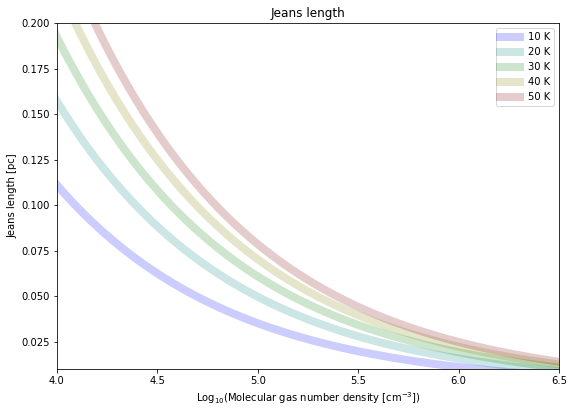

In [11]:
# physical constants
mean_mol_weight = 2.76  # mean molecular weight
mole            =  6.02214129e23
parsec_to_cm    = 3.08567758e18

# initializing arrays
number_density = np.arange(1, 10001, 1) * 1e3
output_array_cgs = np.arange(1, 10001, 1) * 0.0


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([4.0, 6.5, 0.01, 0.2])

# initial conditions
temperature = 10.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0, 0, 1.0, 0.2),
         linewidth=8, label = '10 K')


# initial conditions
temperature = 20.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0, 0.5, 0.5, 0.2),
         linewidth=8, label = '20 K')


# initial conditions
temperature = 30.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0, 0.5, 0.0, 0.2),
         linewidth=8, label = '30 K')


# initial conditions
temperature = 40.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0.5, 0.5, 0.0, 0.2),
         linewidth=8, label = '40 K')


# initial conditions
temperature = 50.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeanslength_cgs(density, temperature, particlemass) / parsec_to_cm

plt.plot(np.log10( number_density ), output_array_cgs, \
         color = (0.5, 0.0, 0.0, 0.2),
         linewidth=8, label = '50 K')

plt.title('Jeans length')
plt.xlabel('Log$_{10}($Molecular gas number density [cm$^{-3}$])')
plt.ylabel('Jeans length [pc]')
plt.legend(loc=1)

### Plot Jeans mass as a function of cloud particle number density

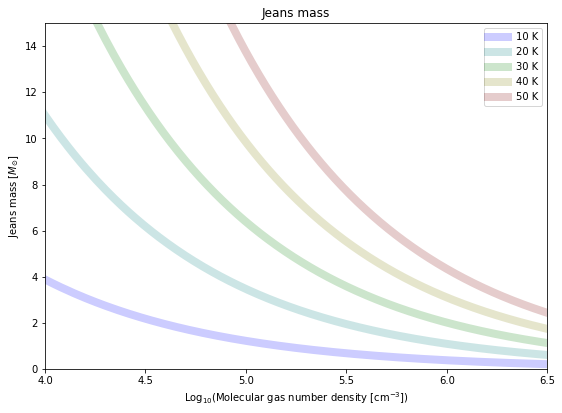

In [12]:
# physical constants
mean_mol_weight = 2.76  # mean molecular weight
mole            =  6.02214129e23
parsec_to_cm    = 3.08567758e18
solar_mass_cgs  = 1.9891e33

# initializing arrays
number_density = np.arange(1, 10001, 1) * 1e3
output_array_cgs = np.arange(1, 10001, 1) * 0.0


# initializing plotting
fig = plt.figure(figsize=(9, 14))
plt.subplot(2, 1, 1)
plt.axis([4.0, 6.5, 0.01, 15])

# initial conditions
temperature = 10.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line10K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0, 0, 1.0, 0.2), \
          linewidth=8, \
          label = '10 K')


# initial conditions
temperature = 20.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line20K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0, 0.5, 0.5, 0.2), \
          linewidth=8, \
          label = '20 K')


# initial conditions
temperature = 30.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line30K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0, 0.5, 0.0, 0.2), \
          linewidth=8, \
          label = '30 K')


# initial conditions
temperature = 40.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line40K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0.5, 0.5, 0.0, 0.2), \
          linewidth = 8, \
          label = '40 K')


# initial conditions
temperature = 50.0  

for id in list( range(0,10000) ):
  
  particlemass = mean_mol_weight / mole
  density = number_density[id] * mean_mol_weight / mole
  output_array_cgs[id] = Jeansmass_cgs(density, temperature, particlemass) / solar_mass_cgs

line50K = plt.plot(np.log10( number_density ), output_array_cgs, \
          color = (0.5, 0.0, 0.0, 0.2), \
          linewidth = 8, \
          label = '50 K')

plt.title('Jeans mass')
plt.xlabel('Log$_{10}$(Molecular gas number density [cm$^{-3}$])')
plt.ylabel('Jeans mass [$M_{\odot}$]')
plt.legend(loc=1)